# Сборный проект 1

## Введение

В этой работе необходимо выявить определяющие успешность игры закономерности на основании данных о продажах игр. Сперва нужно будет выполнить подготовку данных, затем провести анализ данных, выявить зависимости, после чего проверить некоторые гипотезы.

**Работать будем с данными о продажах игр. В распоряжении следующие столбцы:** 
    
Name — название игры
    
Platform — платформа
    
Year_of_Release — год выпуска
    
Genre — жанр игры
    
NA_sales — продажи в Северной Америке (миллионы проданных копий)
    
EU_sales — продажи в Европе (миллионы проданных копий)
    
JP_sales — продажи в Японии (миллионы проданных копий)
    
Other_sales — продажи в других странах (миллионы проданных копий)
    
Critic_Score — оценка критиков (максимум 100)
    
User_Score — оценка пользователей (максимум 10)
    
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
display(data.head())
print(data.info())
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Можно отметить, что в данном датафрейме имеются столбцы с пропусками, также у некоторых столбцов тип данных не соответствует их содержанию.**

## Подготовка данных

### Регистр

*Приведем названия столбцов к нижнему регистру*

In [2]:
data.columns = data.columns.str.lower()

In [3]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Столбцы приведены к нижнему регистру**

### Столбцы

*Рассмотрим подробнее каждый столбец*

#### name

*Рассмотрим строки, где не указано название игры*

In [4]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Без названия имеются 2 старых игры (1993 г), у которых нет информации по оценкам и возрастному рейтингу. Можем избавиться от этих строчек*

In [5]:
data = data.drop(data[data['name'].isna()].index)

*Узнаеем, как много повторяющихся названий игр. Скорее всего, это игры, выпущенные на нескольких платформах.*

In [6]:
data['name'].duplicated().sum()

5154

#### platform

In [7]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [8]:
data['platform'].value_counts().count()

31

31 платформа, пустые значения отсутствуют. Высокий диапазон представленных для платформы игр - от одной до 2161.

#### year of release

*Заменим год выпуска на целочисленные значения, не удаляя пропуски, чтобы не исказить результаты дальнейшего анализа.*

In [9]:
data['year_of_release'] = pd.array(data['year_of_release'], dtype='Int64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


#### genres

*Посмотрим, какие жанры представлены*

In [11]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Все выглядит адекватно, нет дубликатов и жанров с выбивающимся из общего значения количеством игр.

#### sales

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Столбцы с продажами в Северной Америке, Европе, Японии и других странах имеют корректный тип данных float и в них отсутствуют пропуски.

#### critic_score

*Проверим, есть ли дробные значения в столбце 'critic_score'.*

In [13]:
(data['critic_score']%1).value_counts() #Остаток от деления на 1 вернет дробную часть числа

0.0    8137
Name: critic_score, dtype: int64

*Заменим оценку критиков на целочисленные значения*

In [14]:
data['critic_score'] = pd.array(data['critic_score'], dtype='Int64')

#### user_score

*Рассмотрим, какие значение присутствуют в столбце 'user_score'*

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*Как много строк, в которых в пользовательском рейтинге указано 'tbd' (to be determined, подлежит уточнению)?*

In [16]:
data.query('user_score == "tbd"').shape

(2424, 11)

*2424 строки - слишком большое количество, чтобы удалить эти строки или заменить значения на другое, не исказив результаты дальнейшего анализа. Заменим эти значения на 'nan', чтобы можно было установить тип данных для столбца float*

In [17]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [18]:
data['user_score'] = data['user_score'].astype(float)

#### rating

*Посмотрим, какие возрастные рейтинги есть в датафрейме*

In [19]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

*Очевидно, рейтинги EC, K-A, RP и AO выбиваются,так как представлены малым количеством игр. Чтобы избавиться от этих значений, заменим эти категории на наиболее близкие из первых четырех. Ниже описаны обозначения возрастных рейтингов.*

> EC (от англ. early childhood) – игра предназначена специально для детей младшего возраста (от 3 лет). Это развивающая программа, выполненная в ярком мультипликационном стиле, которая полностью исключает сцены насилия.

> E (everyone) — приложение рассчитано на любую возрастную категорию, но больше всего привлечет интерес детей от 6 лет. Это может быть и познавательная, и развлекательная игра. В ней допустимы минимально жестокие сцены.

> E10+ (everyone 10 and older) – игра для всех, кому исполнилось 10. Это относительно новый рейтинг, который был принят в 2005 году. Игры с такой маркировкой отображают минимум крови, откровенных и насильственных сцен.

> T (teen) — приложение, рассчитанное на подростков от 13 лет. Геймплей может включать небольшое количество сцен с ненормативной лексикой, а также умеренно откровенные и жестокие эпизоды.

> M (mature) — игра рассчитана на взрослых и подростков старше 17. Игры с такой маркировкой запрещены для использования детьми младшего возраста, так как содержат довольно много непристойных и жестоких эпизодов с кровью, убийствами и действиями сексуального характера.

> AO (adults only 18+) – контент этой игры предназначен исключено для взрослой аудитории. Покупатель может столкнуться с необходимостью подтвердить свой возраст.

> RP (rating pending) – эта маркировка значит, что приложение ожидает решения от ESRB и на данный момент не имеет рейтинга. Обозначение может встретиться в рекламных роликах и видеотрейлерах.

> K-A ("Kids to Adults") - первоначальное название категории E

*Категорию EC заменим на E10+, K-A - на E, RP - на E, AO - на M.*

In [20]:
data['rating'] = data['rating'].replace({'EC':'E10+', 'K-A':'E', 'RP':'E', 'AO':'M'})

### Заполнение пропусков

*Заполним пропуски в годах на год выпуска той же игры на другой платформе. Для этого создадим таблицу-словарь, где напротив каждого названия игры будет стоять год выпуска, если он указан для какой-либо платформы*

In [21]:
year_pivot = data[~data['year_of_release'].isna()].pivot_table(index='name', values='year_of_release', aggfunc='mean')

*Округлим полученные значения (на случай, если для одной игры указывались разные года на разных платформах) и приведем к целочисленному типу данных*

In [22]:
year_pivot['year_of_release'] = year_pivot['year_of_release'].astype(int)

In [23]:
year_pivot

,year_of_release
name,
Beyblade Burst,2016
Fire Emblem Fates,2015
Frozen: Olaf's Quest,2013
Haikyu!! Cross Team Match!,2016
Tales of Xillia 2,2012
...,...
thinkSMART FAMILY!,2010
thinkSMART: Chess for Kids,2011
uDraw Studio,2010


*Напишем функцию для одной строки для заполнения пустых значений из таблицы year_pivot*

In [24]:
def fill_year(row):
    x = row['name']
    if x in year_pivot.index:
        right_year = year_pivot.loc[x,'year_of_release']
        return right_year

*Применим функцию к срезу с пропущенным годом выпуска*

In [25]:
data.loc[data.year_of_release.isna(), 'year_of_release'] = data[data['year_of_release'].isna()].apply(fill_year, axis=1)

In [26]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


None

**Таким методом мы заполнили 123 пропуска в столбце с датой релиза игры.**

*Аналогичным методом заменим пропуске в столбце с возрастным рейтингом игры. Сначала создадим таблицу-словарь*

In [27]:
rating_pivot = data[~data['rating'].isna()].pivot_table(index='name', values='rating', aggfunc='first')
rating_pivot

,rating
name,
Tales of Xillia 2,T
.hack//Infection Part 1,T
.hack//Mutation Part 2,T
.hack//Outbreak Part 3,T
007 Racing,T
...,...
thinkSMART,E
thinkSMART FAMILY!,E
thinkSMART: Chess for Kids,E


*Напишем функцию для одной строки для заполнения пустых значений из таблицы year_pivot*

In [28]:
def fill_rating(row):
    x = row['name']
    if x in rating_pivot.index:
        right_rating = rating_pivot.loc[x, 'rating']
        return right_rating

*Применим функцию к срезу с пропущенным возрастным рейтингом*

In [29]:
data.loc[data.rating.isna(), 'rating'] = data[data['rating'].isna()].apply(fill_rating, axis=1)

In [30]:
display(data.info())
data['rating'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           10386 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


None

E       4158
T       3094
M       1654
E10+    1480
Name: rating, dtype: int64

**Таким образом, этим методом заполнено 437 пропусков.**

### Суммарные продажи

*Добавим столбец 'total_sales', куда занесем суммарные продажи во всех регионах*

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [32]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,None,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,None,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,None,0.01


## Исследовательский анализ данных

### Игры по годам

*Рассмотрим количество выпущенных игр по годам*

<AxesSubplot:title={'center':'количество выпущенных игр по годам'}, xlabel='year_of_release'>

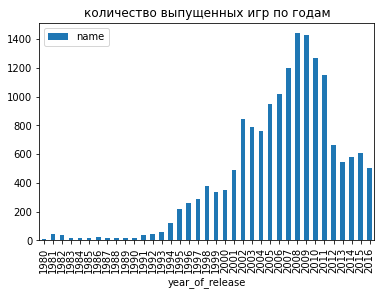

In [33]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', title='количество выпущенных игр по годам')

**На диаграмме видно, что раньше игры вы-пускались в крайне малых количествах. Стабильно более 200 игр в год стало выпускаться только с 1995 года, а пик пришелся на 2008-2009 гг. Актуальным периодом можно считать период с 2012 года - стабильное количество продаж после падения в 2011-2012 гг.**

### Продажи по платформам

*Найдем платформы с наибольшими суммарными продажами за актуальный период*

In [34]:
sales_pivot = data.query('year_of_release >= 2012').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_pivot

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


Чтобы оценить продолжительность существования платформы, создадим сводную таблицу, где отобразим первый и последний года выхода игр для разных платформ, затем добавим столбец с продолжительностью существования платформы

In [35]:
platform_pivot = data.pivot_table(index='platform', values='year_of_release', aggfunc={'min', 'max'})
platform_pivot['last'] = platform_pivot['max'] - platform_pivot['min'] + 1
platform_pivot.sort_values(by='last', ascending=False, inplace=True)
display(platform_pivot)
print('Средняя продолжительность существования платформы {:.1f}'.format(platform_pivot['last'].mean()))

,max,min,last
platform,,,
PC,2016,1985,32
DS,2013,1985,29
2600,1998,1980,19
PS3,2016,2001,16
3DS,2016,2003,14
GB,2001,1988,14
X360,2016,2005,12
PSP,2015,2004,12
NES,1994,1983,12


Средняя продолжительность существования платформы 9.4


Персональный компьютер и Nintendo DS являются самыми долгосуществующими платформами - 32 и 29 лет соответственно при среднем значении 9,4 лет. Многие платформы не переживают планку в 5 лет.

*Наибольшие продажи отмечаются у игр для пяти платформ: PlayStation 3 и 4, Xbox 360 и One, Nintendo 3DS. Рассмотрим изменения продаж игр для этих платформ по годам.*

In [36]:
top_platforms = sales_pivot.head(5).index
top_platforms_sales = data[(data['platform'].isin(top_platforms)) & (data.year_of_release >= 2012)].pivot_table(index='year_of_release', values='total_sales', columns='platform')
top_platforms_sales

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2012,0.550638,0.726711,NaN,0.932593,NaN
2013,0.621648,0.898810,1.624375,1.181067,0.997895
2014,0.547000,0.442222,1.333333,0.551429,0.886393
2015,0.323023,0.230411,0.867883,0.341714,0.751750
2016,0.329130,0.094737,0.422256,0.116923,0.300575


Создадим датафрейм data_actual, куда войдут только даннные за период 2012-2016 гг

In [37]:
data_actual = data.query('year_of_release >= 2012')

*Построим график*

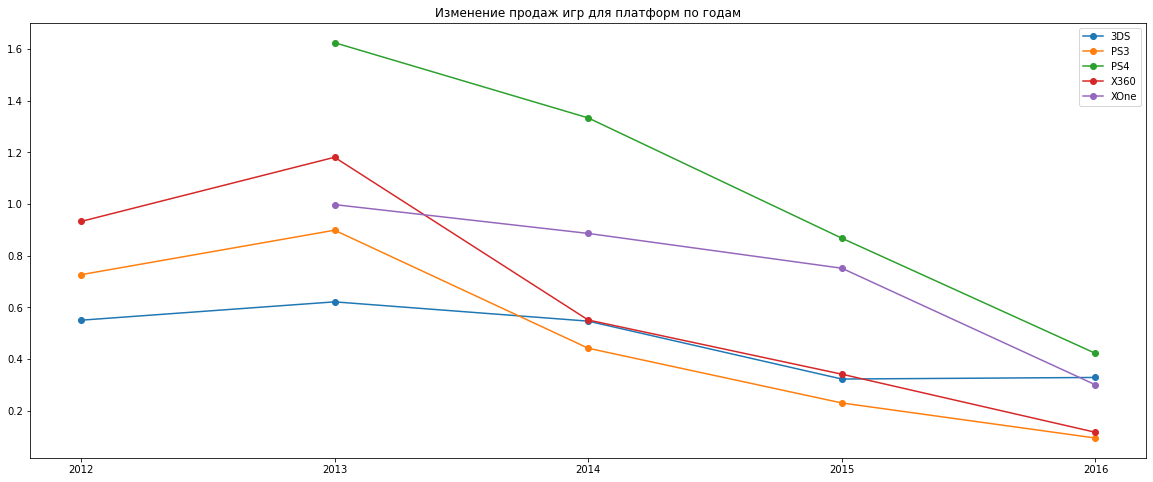

In [38]:
plt.figure(figsize=((20,8)))
plt.plot(top_platforms_sales,  marker = 'o')
plt.legend(top_platforms_sales.columns)
plt.xticks(top_platforms_sales.index.astype(int))
plt.title('Изменение продаж игр для платформ по годам')
plt.show()

**Несмотря на тенденцию к снижению объемов продаж игр, на рынке сохраняется доминация игр для PlayStation 4. Наиболее стабильные продажи сохраняются у Nintendo 3DS.**

**Единственная платформа из топа, у которой продажи за последний год выросли, - это Nintendo 3DS. Эту приставку можно назвать наиболее перспективной платформой. Нужно отметить, что данные за 2016 год могут быть неполными. Поэтому недавно вышедшие платформы XOne и PS4 мы также можем считать перспективными. **

*Рассмотрим общий объем продаж в разбивке по платформам и построим "ящик с усами".*

Text(0.5, 1.0, 'Объем продаж в разбивке по платформам')

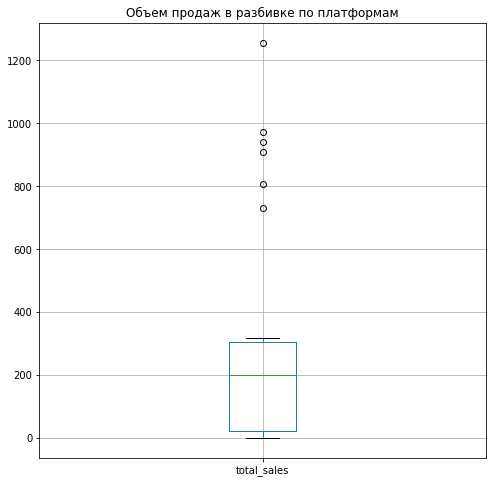

In [39]:
plt.figure(figsize=((8,8)))
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').boxplot()
plt.title('Объем продаж в разбивке по платформам')

**На графике видно, что продажи игр для нескольких платформ на порядок выше, чем суммарные продажи игр для остальных платформ.**

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Напишем функцию, которая будет строить диаграмму, в качестве аргумента - платформа. Применим эту функцию к нашей выборке из платформ с наибольшими продажами. Данные для анализа - выделенный ранее актуальный период.

In [40]:
def add_boxplot(platform):
    plt.figure(figsize=((6,6)))
    data_actual.loc[data_actual['platform'] == i].boxplot(column='total_sales')
    plt.title('Объем продаж в разбивке по платформe ' + platform)
    plt.show()

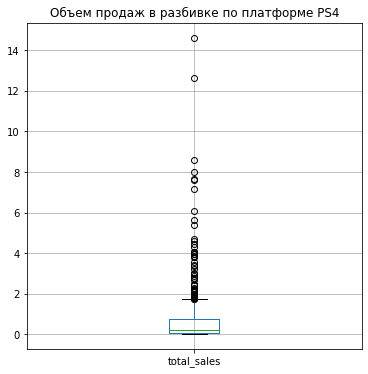

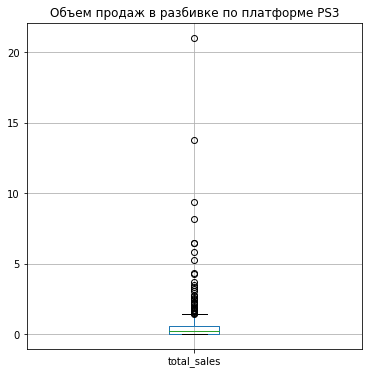

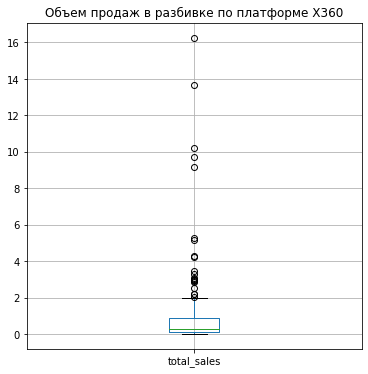

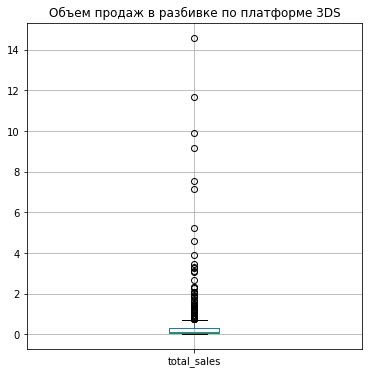

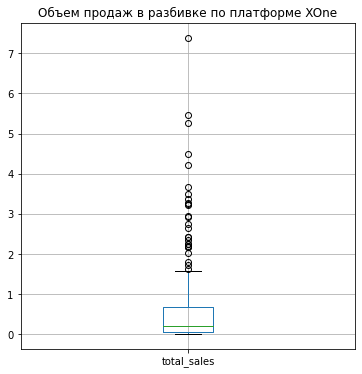

In [41]:
for i in top_platforms:
    add_boxplot(i)

**По каждой платформе отмечается высокий разброс по объемам продаж для игр - самые продаваемые игры в несколько раз опережают третий квартиль. Вероятно, это AAA-игры (наиболее высокобюджетные компьютерные игры, рассчитанные на массовую аудиторию и требующие высоких затрат как на саму разработку игры, так и на её маркетинг).**

### Влияние отзывов на продажи

*Рассмотрим зависимость продаж игр для PlayStation 3 от оценок критиков и пользователей*

*Построим графики корреляции между продажами игр и их оценками*

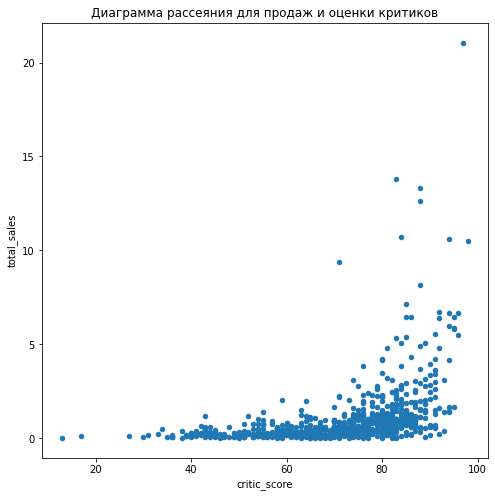

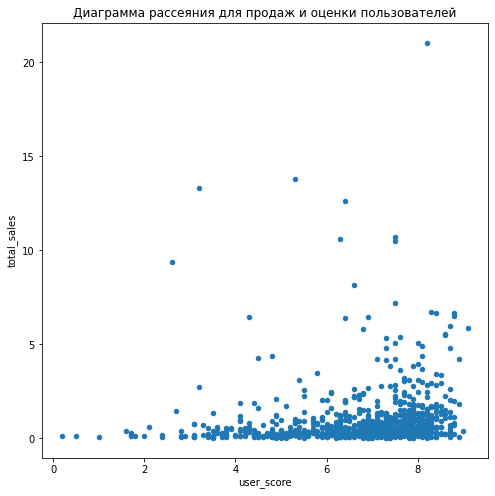

In [42]:
data.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8, 8))
plt.title('Диаграмма рассеяния для продаж и оценки критиков')
plt.show()
data.query('platform == "PS3"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 8))
plt.title('Диаграмма рассеяния для продаж и оценки пользователей')
plt.show()

*Диаграммы получились неинформативными из-за нескольких игр с большими продажами. Оставим только игры с продажами до 5 млн копий*

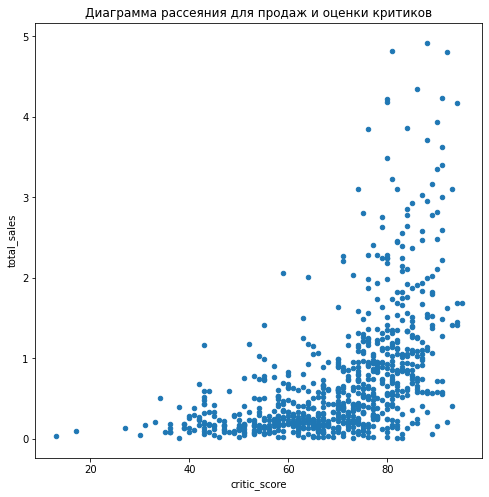

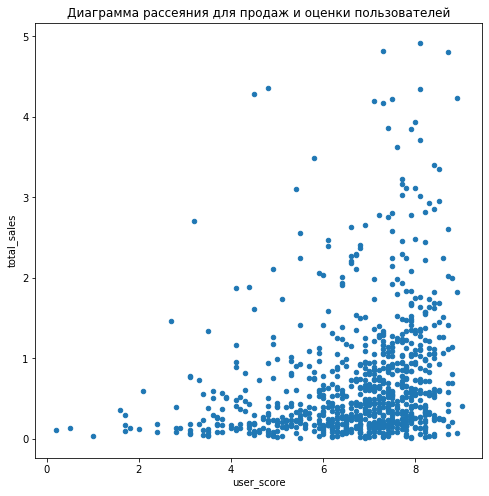

In [43]:
data.query('platform == "PS3" and total_sales < 5').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8, 8))
plt.title('Диаграмма рассеяния для продаж и оценки критиков')
plt.show()
data.query('platform == "PS3" and total_sales < 5').plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 8))
plt.title('Диаграмма рассеяния для продаж и оценки пользователей')
plt.show()

*Определенная зависимость явно присутствует. Найдем коэффициенты корреляции для этих величин.*

In [44]:
print('Коэффициент корреляции между продажами игр на PlayStation 3 и оценкой критиков составляет {:.2f}'.format(
     data.query('platform == "PS3" and total_sales < 5')['total_sales'].corr(
     data.query('platform == "PS3" and total_sales < 5')['critic_score'].astype(float))))
print('Коэффициент корреляции между продажами игр на PlayStation 3 и оценкой пользователей составляет {:.2f}'.format(
     data.query('platform == "PS3" and total_sales < 5')['total_sales'].corr(
     data.query('platform == "PS3" and total_sales < 5')['user_score'])))

Коэффициент корреляции между продажами игр на PlayStation 3 и оценкой критиков составляет 0.52
Коэффициент корреляции между продажами игр на PlayStation 3 и оценкой пользователей составляет 0.24


**Корреляцию между продажами и оценкой критиков можно назвать средней положительной, корреляцию между продажами и оценкой пользователей - слабой положительной. Очевидно, что помимо оценок на продажи игр влияет множество факторов.**

### Распределение игр по жанрам

*Рассмотрим распределение игр по жанрам*

In [45]:
data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


**Самыми прибыльными жанрами являются экшен, спорт и шутеры - общий объем продаж игр у каждого из них более 1 млрд копий. Наименее прибыльным жанром является стратегия - меньше 200 млн проданных копий игр.**

## Портрет пользователя каждого региона

### Платформы

*Найдем топ-5 по популярности платформ для каждого региона (NA, EU, JP)*

In [46]:
def top5_platforms(region_sales): #Функция для построения столбчатой диаграммы
    bar_table = data.pivot_table(index='platform', aggfunc='sum', values=region_sales).sort_values(by=region_sales, ascending=False).head(5)
    plt.figure(figsize=((8,8)))
    bar_table.plot(kind='bar')
    plt.title(region_sales)
    plt.show

<Figure size 576x576 with 0 Axes>

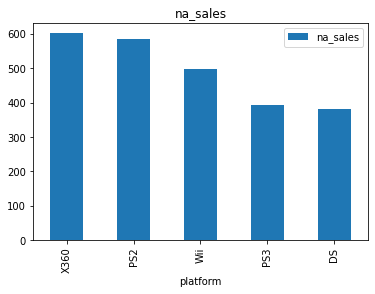

<Figure size 576x576 with 0 Axes>

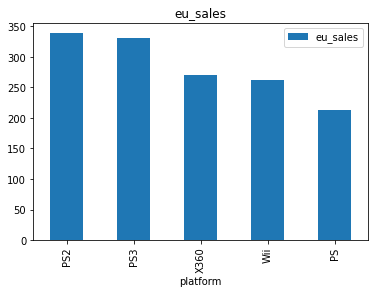

<Figure size 576x576 with 0 Axes>

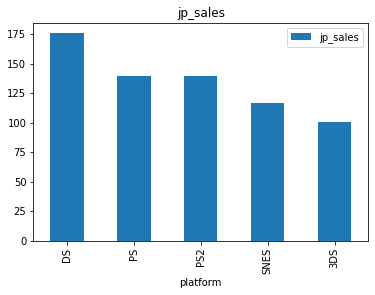

In [47]:
top5_platforms('na_sales')
top5_platforms('eu_sales')
top5_platforms('jp_sales')

**Можно отметить, что в Северной Америке наибольшая доля по продажам игр у Xbox 360, что, вероятно, связаано с тем, что эта приставка производится в США, в то время как в Японии Xbox даже не входит в топ-5 платформ. Зато в Японии присутствует явная доминация приставок от японской компании Nintendo.**

### Жанры

*Напишем аналогичную функцию для построения круговой диаграммы*

In [48]:
def top5_genres(region_sales):
    bar_table = data.pivot_table(index='genre', aggfunc='sum', values=region_sales).sort_values(by=region_sales, ascending=False).head(5)
    plt.figure(figsize=((8,8)))
    bar_table.plot(kind='bar')
    plt.title(region_sales)
    plt.show

<Figure size 576x576 with 0 Axes>

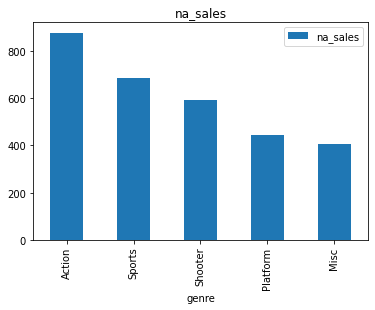

<Figure size 576x576 with 0 Axes>

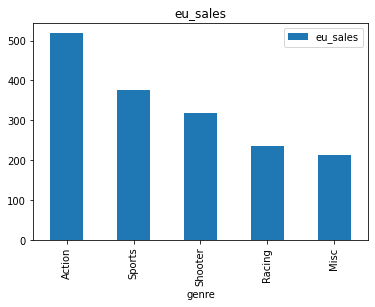

<Figure size 576x576 with 0 Axes>

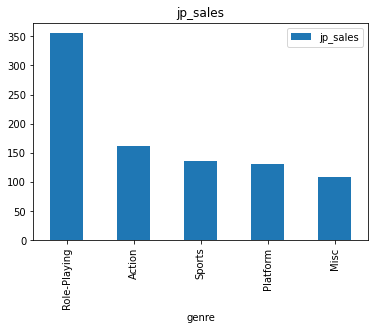

In [49]:
top5_genres('na_sales')
top5_genres('eu_sales')
top5_genres('jp_sales')

**Распределение популярности игр по жанрам в Северной Америке и Европе похожее - лидирует экшен, в тройку также входят спорт и шутеры. В Японии же с огромным отрывом лидируют ролевые игры.**

### Рейтинг ESRB

*Рассмотрим различие в объеме продаж игр разных жанров между разными регионами*

Выделим игры, где не указан возрастной рейтинг, в отдельную категорию 'no_rating'. Рассматривать будем срез по актуальному периоду data_actual.

In [50]:
data_actual['rating'].fillna('no_rating')

16               M
23               M
31       no_rating
33       no_rating
34               M
           ...    
16703    no_rating
16707    no_rating
16710    no_rating
16712    no_rating
16714    no_rating
Name: rating, Length: 2899, dtype: object

In [51]:
rating_table = data_actual.pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
rating_table

,eu_sales,jp_sales,na_sales
rating,,,
E,115.40,29.27,117.79
E10+,59.80,8.57,80.07
M,206.43,22.59,242.34
T,57.04,29.13,69.80


<AxesSubplot:title={'center':'Продажи игр разных жанров в регионах'}>

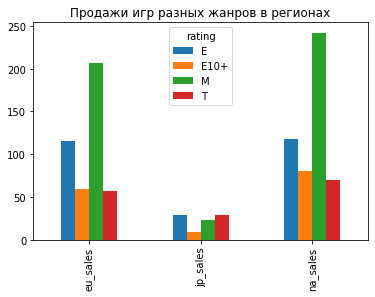

In [52]:
rating_table.transpose().plot(kind='bar', title='Продажи игр разных жанров в регионах')

**Как видно из диаграммы, в Европе и Северной Америке лидируют игры с рейтингом M (mature), в то время как в Японии наравне с M также популярны игры категорий E (everyone) и T (teen). Необходимо отметить, что по у большинства японских игр не указан возрастной рейтинг (в данном регионе действует своя рейтинговая система CERO, рейтинг ESRB необязателен), поэтому нельзя уверенно говорить о репрезентативности проанализированной выборки.**

**На графике видно, что везде лидируют игры рейтинга E (everyone), наименее популярны игры E10+ (everyone 10 and older). Примечательно, что игры категорий M (mature) и T (teen) равнопопулярны в Северной Америке, в то время как в Европе лучше продаются игры категории M, а в Японии - T.**

## Проверка гипотез

### "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

*Нулевая гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC не различаются. Альтернативная гипотеза H1 - средние пользовательские рейтинги платформ Xbox One и PC различаются. Уровень статистической значимости примем за 5 %.*

In [53]:
print('Средний пользовательский рейтинг для Xbox One: {:.2f}'.format(data.query('platform == "XOne"')['user_score'].mean()))
print('Средний пользовательский рейтинг для PC: {:.2f}'.format(data.query('platform == "PC"')['user_score'].mean()))
alpha = 0.05
result = st.ttest_ind(data.query('platform == "XOne"')['user_score'].dropna(), data.query('platform == "PC"')['user_score'].dropna())
print('pvalue = ', result.pvalue)
if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
if result.pvalue > 0.05:
    print('Не отвергаем нулевую гипотезу')

Средний пользовательский рейтинг для Xbox One: 6.52
Средний пользовательский рейтинг для PC: 7.06
pvalue =  1.3896435533548819e-05
Отвергаем нулевую гипотезу


**Вероятность получить такую выбору при равных пользовательских рейтингах для XBox One и PC практически равна нулю, на основании чего мы отвергаем гипотезу об их равенстве - пользовательский рейтинг для PC выше.**

### "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

*Нулевая гипотеза H0 - средние пользовательские рейтинги жанров Action и Sports не различаются. Альтернативная гипотеза H1 - средние пользовательские рейтинги жанров Action и Sport различаются. Уровень статистической значимости примем за 5 %.*

In [54]:
print('Средний пользовательский рейтинг для игр жанра Action: {:.2f}'.format(data.query('genre == "Action"')['user_score'].mean()))
print('Средний пользовательский рейтинг для игр жанра Sports: {:.2f}'.format(data.query('genre == "Sports"')['user_score'].mean()))
alpha = 0.05
result = st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(), data.query('genre == "Sports"')['user_score'].dropna())
print('pvalue = ', result.pvalue)
if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
if result.pvalue > 0.05:
    print('Не отвергаем нулевую гипотезу')

Средний пользовательский рейтинг для игр жанра Action: 7.05
Средний пользовательский рейтинг для игр жанра Sports: 6.96
pvalue =  0.10406951359049141
Не отвергаем нулевую гипотезу


**Вероятность получить такую выборку при равных пользовательских рейтингах для жанров Action и Sports чуть больше 10%, на основании чего мы не можем опровергнуть нулевую гипотезу об их равенстве. Тогда проверяемя гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, считается неподтвержденной.**

## Вывод

В этом проекте был выполнен исследовательский анализ данных - определен актуальный период в продажах игр, выявлены лидируещие платформы, найдена зависимость влияния оценок пользователей на продажи игр. Выявлены и описаны различия в продажах игр для разных регионов (Европы, Северной Америки и Японии). 
Отвергнута гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, не подтверждена.

### Детальные выводы:
* В ходе работы были обработаны исходные данные - оптимизирован тип данных, заполнены пропуски.
    
* Выявлен актуальный период продажи игр - 2012-2016 гг - это период, когда продажи вышли на стабильный уровень после провала в 2011-2012 гг. 
    
* Определен средний срок существования платформы - 9,4 лет, при этом лидеры по продолжительности существования - персональный компьютер и Nintendo DS (32 и 29 лет соответственно)
    
* Наибольшие продажи за актуальный период отмечаются у игр для пяти платформ: PlayStation 3 и 4, Xbox 360 и One, Nintendo 3DS. Несмотря на тенденцию к снижению объемов продаж игр, на рынке сохраняется доминация игр для PlayStation 4. Наиболее стабильные продажи сохраняются у Nintendo 3DS. Nintendo 3DS - это также единственная платформа из топа, у которой продажи за последний год выросли. Эту приставку можно назвать наиболее перспективной платформой.
    
* По каждой платформе отмечается высокий разброс по объемам продаж для игр - самые продаваемые игры в несколько раз опережают третий квартиль. Вероятно, это AAA-игры (наиболее высокобюджетные компьютерные игры, рассчитанные на массовую аудиторию и требующие высоких затрат как на саму разработку игры, так и на её маркетинг).
    
* Корреляцию между продажами и оценкой критиков можно назвать средней положительной, корреляцию между продажами и оценкой пользователей - слабой положительной. Очевидно, что помимо оценок на продажи игр влияет множество факторов.
    
* Самыми прибыльными жанрами являются экшен, спорт и шутеры - общий объем продаж игр у каждого из них более 1 млрд копий. Наименее прибыльным жанром является стратегия - меньше 200 млн проданных копий игр.
    
* Можно отметить, что в Северной Америке наибольшая доля по продажам игр у Xbox 360, что, вероятно, связаано с тем, что эта приставка производится в США, в то время как в Японии Xbox даже не входит в топ-5 платформ. Зато в Японии присутствует явная доминация приставок от японской компании Nintendo.
    
* Распределение популярности игр по жанрам в Северной Америке и Европе похожее - лидирует экшен, в тройку также входят спорт и шутеры. В Японии же с огромным отрывом лидируют ролевые игры.
    
* В Европе и Северной Америке лидируют игры с рейтингом M (mature), в то время как в Японии наравне с M также популярны игры категорий E (everyone) и T (teen). Необходимо отметить, что по у большинства японских игр не указан возрастной рейтинг, поэтому нельзя уверенно говорить о репрезентативности проанализированной выборки.
    
* Отвергнута гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, неподтвержденной.